In [1]:
import csv

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# use process_csv to pull out the header and data rows
csv_rows = process_csv("water_main_breaks.csv")
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

In [2]:
year={}
index= csv_header.index("break_year")

for i in csv_data:
    if i[index] in year:
        year[i[index]]+=1
    else:
        year[i[index]]=1

year

{'2007': 237,
 '2008': 197,
 '1988': 167,
 '1985': 169,
 '1984': 122,
 '1983': 130,
 '1989': 202,
 '1980': 153,
 '1982': 153,
 '1986': 127,
 '1987': 127,
 '1981': 102,
 '1991': 157,
 '1994': 187,
 '1990': 120,
 '1992': 112,
 '1993': 134,
 '1995': 133,
 '1996': 148,
 '1997': 136,
 '2005': 177,
 '2004': 141,
 '1998': 120,
 '2006': 125,
 '1999': 144,
 '2001': 139,
 '2002': 168,
 '2003': 181,
 '2000': 196,
 '2009': 184,
 '2010': 185,
 '': 6,
 '2011': 211,
 '135': 1,
 '152': 1,
 '2012': 208,
 '2013': 247,
 '2014': 346,
 '2015': 179,
 '2016': 205,
 '2017': 214,
 '2018': 272,
 '2019': 219,
 '2020': 111}

In [3]:
from collections import OrderedDict 
pipe_size={}
index= csv_header.index("pipe_size")
index2=csv_header.index("break_year")

for i in csv_data:
    try:
        if int(i[index2])<=2020 and int(i[index2])>2010:
            if float(i[index]) in pipe_size:
                pipe_size[float(i[index])]+=1
            else:
                pipe_size[float(i[index])]=1
    except:
        continue

pipe_size

{6.0: 1319,
 1.0: 59,
 20.0: 2,
 8.0: 243,
 12.0: 63,
 2.0: 26,
 10.0: 127,
 0.75: 52,
 4.0: 94,
 1.5: 11,
 16.0: 4,
 3.0: 7,
 0.625: 2,
 7.0: 1,
 6.75: 1}

In [4]:
ranged=list(pipe_size.keys())

In [5]:
frequency=list(pipe_size.values())

In [6]:
import numpy as np

x=np.array(ranged).reshape(15,1)

In [7]:
x2=np.square(x).reshape(15,1)

In [8]:
m= x.shape
# Create new matrix to hold the orthonormal basis
ones = np.ones(m) 

In [9]:
X=np.append(x2,x,axis=1)

In [10]:
X=np.append(X,ones,axis=1)

In [11]:
X

array([[3.60000e+01, 6.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [4.00000e+02, 2.00000e+01, 1.00000e+00],
       [6.40000e+01, 8.00000e+00, 1.00000e+00],
       [1.44000e+02, 1.20000e+01, 1.00000e+00],
       [4.00000e+00, 2.00000e+00, 1.00000e+00],
       [1.00000e+02, 1.00000e+01, 1.00000e+00],
       [5.62500e-01, 7.50000e-01, 1.00000e+00],
       [1.60000e+01, 4.00000e+00, 1.00000e+00],
       [2.25000e+00, 1.50000e+00, 1.00000e+00],
       [2.56000e+02, 1.60000e+01, 1.00000e+00],
       [9.00000e+00, 3.00000e+00, 1.00000e+00],
       [3.90625e-01, 6.25000e-01, 1.00000e+00],
       [4.90000e+01, 7.00000e+00, 1.00000e+00],
       [4.55625e+01, 6.75000e+00, 1.00000e+00]])

In [12]:
y=np.array(frequency).reshape(15,1)
y

array([[1319],
       [  59],
       [   2],
       [ 243],
       [  63],
       [  26],
       [ 127],
       [  52],
       [  94],
       [  11],
       [   4],
       [   7],
       [   2],
       [   1],
       [   1]])

In [13]:
w=np.linalg.inv(X.transpose()@X)@X.transpose()@y

In [14]:
w

array([[-3.01334397],
       [54.53175292],
       [ 2.07677413]])

In [15]:
y_resultant=X@w

In [16]:
y_resultant

array([[ 220.78690879],
       [  53.59518308],
       [-112.62575476],
       [ 245.47678352],
       [ 222.53627774],
       [  99.0869041 ],
       [ 246.0599065 ],
       [  41.28058284],
       [ 171.99028232],
       [  77.09437958],
       [ 103.16876498],
       [ 138.55193718],
       [  34.98203222],
       [ 236.14519012],
       [ 232.87062178]])

In [17]:
test_x=np.arange(1,17,1)
test_x=np.array(test_x).reshape(16,1)

In [18]:
test_x2=np.square(test_x)
test_x2

array([[  1],
       [  4],
       [  9],
       [ 16],
       [ 25],
       [ 36],
       [ 49],
       [ 64],
       [ 81],
       [100],
       [121],
       [144],
       [169],
       [196],
       [225],
       [256]])

In [19]:
m= test_x.shape
# Create new matrix to hold the orthonormal basis
test_1 = np.ones(m)

In [20]:
test=np.append(test_x2,test_x,axis=1)

In [21]:
test=np.append(test,test_1,axis=1)

In [22]:
test

array([[  1.,   1.,   1.],
       [  4.,   2.,   1.],
       [  9.,   3.,   1.],
       [ 16.,   4.,   1.],
       [ 25.,   5.,   1.],
       [ 36.,   6.,   1.],
       [ 49.,   7.,   1.],
       [ 64.,   8.,   1.],
       [ 81.,   9.,   1.],
       [100.,  10.,   1.],
       [121.,  11.,   1.],
       [144.,  12.,   1.],
       [169.,  13.,   1.],
       [196.,  14.,   1.],
       [225.,  15.,   1.],
       [256.,  16.,   1.]])

In [23]:
y_test=test@w

In [24]:
y_test

array([[ 53.59518308],
       [ 99.0869041 ],
       [138.55193718],
       [171.99028232],
       [199.40193952],
       [220.78690879],
       [236.14519012],
       [245.47678352],
       [248.78168898],
       [246.0599065 ],
       [237.31143609],
       [222.53627774],
       [201.73443146],
       [174.90589723],
       [142.05067508],
       [103.16876498]])

In [25]:
test_dict={}
for i in range(16):
    test_dict[i+1]=y_test[i][0]
test_dict

{1: 53.59518308411861,
 2: 99.08690409776352,
 3: 138.55193717515704,
 4: 171.9902823162992,
 5: 199.40193952118995,
 6: 220.7869087898293,
 7: 236.14519012221731,
 8: 245.47678351835393,
 9: 248.78168897823915,
 10: 246.05990650187294,
 11: 237.31143608925544,
 12: 222.53627774038648,
 13: 201.7344314552662,
 14: 174.9058972338945,
 15: 142.05067507627143,
 16: 103.16876498239697}

In [26]:
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame
%matplotlib inline

In [27]:
df=DataFrame(Series(test_dict))
df.index=df.index.astype(float)
df=df.sort_index()
df=df.rename(columns={0:'Main Breaks'})
df

,Main Breaks
1.0,53.595183
2.0,99.086904
3.0,138.551937
4.0,171.990282
5.0,199.401940
6.0,220.786909
7.0,236.145190
8.0,245.476784
9.0,248.781689
10.0,246.059907


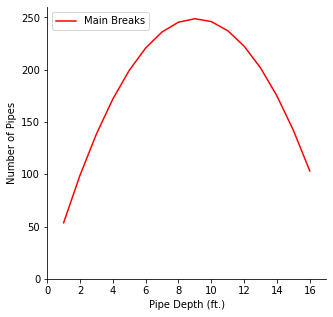

In [38]:
ax1= df.plot.line(color="r",xticks=[0,2,4,6,8,10,12,14,16],figsize=[5,5])
ax1.set_xlim([0,17])
ax1.set_ylim([0,260])
ax1.set_ylabel("Number of Pipes")
ax1.set_xlabel("Pipe Depth (ft.)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

In [29]:
x3=x**3
x3

array([[2.16000000e+02],
       [1.00000000e+00],
       [8.00000000e+03],
       [5.12000000e+02],
       [1.72800000e+03],
       [8.00000000e+00],
       [1.00000000e+03],
       [4.21875000e-01],
       [6.40000000e+01],
       [3.37500000e+00],
       [4.09600000e+03],
       [2.70000000e+01],
       [2.44140625e-01],
       [3.43000000e+02],
       [3.07546875e+02]])

In [30]:
Xv2=np.append(x3,X,axis=1)
Xv2

array([[2.16000000e+02, 3.60000000e+01, 6.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.00000000e+03, 4.00000000e+02, 2.00000000e+01, 1.00000000e+00],
       [5.12000000e+02, 6.40000000e+01, 8.00000000e+00, 1.00000000e+00],
       [1.72800000e+03, 1.44000000e+02, 1.20000000e+01, 1.00000000e+00],
       [8.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.00000000e+03, 1.00000000e+02, 1.00000000e+01, 1.00000000e+00],
       [4.21875000e-01, 5.62500000e-01, 7.50000000e-01, 1.00000000e+00],
       [6.40000000e+01, 1.60000000e+01, 4.00000000e+00, 1.00000000e+00],
       [3.37500000e+00, 2.25000000e+00, 1.50000000e+00, 1.00000000e+00],
       [4.09600000e+03, 2.56000000e+02, 1.60000000e+01, 1.00000000e+00],
       [2.70000000e+01, 9.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [2.44140625e-01, 3.90625000e-01, 6.25000000e-01, 1.00000000e+00],
       [3.43000000e+02, 4.90000000e+01, 7.00000000e

In [31]:
wv2=np.linalg.inv(Xv2.transpose()@Xv2)@Xv2.transpose()@y
wv2

array([[   0.54130015],
       [ -18.80903757],
       [ 167.66830689],
       [-142.65728067]])

In [32]:
test_x3=test_x**3

In [33]:
testv2=np.append(test_x3,test,axis=1)
testv2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [8.000e+00, 4.000e+00, 2.000e+00, 1.000e+00],
       [2.700e+01, 9.000e+00, 3.000e+00, 1.000e+00],
       [6.400e+01, 1.600e+01, 4.000e+00, 1.000e+00],
       [1.250e+02, 2.500e+01, 5.000e+00, 1.000e+00],
       [2.160e+02, 3.600e+01, 6.000e+00, 1.000e+00],
       [3.430e+02, 4.900e+01, 7.000e+00, 1.000e+00],
       [5.120e+02, 6.400e+01, 8.000e+00, 1.000e+00],
       [7.290e+02, 8.100e+01, 9.000e+00, 1.000e+00],
       [1.000e+03, 1.000e+02, 1.000e+01, 1.000e+00],
       [1.331e+03, 1.210e+02, 1.100e+01, 1.000e+00],
       [1.728e+03, 1.440e+02, 1.200e+01, 1.000e+00],
       [2.197e+03, 1.690e+02, 1.300e+01, 1.000e+00],
       [2.744e+03, 1.960e+02, 1.400e+01, 1.000e+00],
       [3.375e+03, 2.250e+02, 1.500e+01, 1.000e+00],
       [4.096e+03, 2.560e+02, 1.600e+01, 1.000e+00]])

In [34]:
y_testv2=testv2@wv2

In [35]:
test_dictv2={}
for i in range(16):
    test_dictv2[i+1]=y_testv2[i][0]
test_dictv2

{1: 6.743288796529157,
 2: 121.7735840259109,
 3: 205.6814059058671,
 4: 261.7145553288717,
 5: 293.1208331873984,
 6: 303.14804037392105,
 7: 295.04397778091334,
 8: 272.0564463008491,
 9: 237.43324682620232,
 10: 194.42218024944668,
 11: 146.27104746305622,
 12: 96.22764935950454,
 13: 47.539786831265246,
 14: 3.455260770812856,
 15: -32.77812792938039,
 16: -57.91257837683861}

In [36]:
df2=DataFrame(Series(test_dictv2))
df2.index=df2.index.astype(float)
df2=df2.sort_index()
df2=df2.rename(columns={0:'Main Breaks'})
df2

,Main Breaks
1.0,6.743289
2.0,121.773584
3.0,205.681406
4.0,261.714555
5.0,293.120833
6.0,303.148040
7.0,295.043978
8.0,272.056446
9.0,237.433247
10.0,194.422180


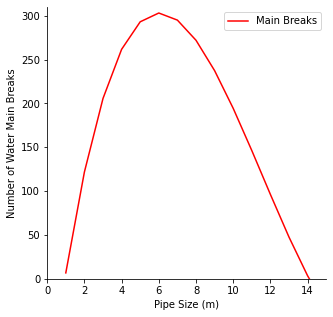

In [40]:
ax1= df2.plot.line(color="r",xticks=[0,2,4,6,8,10,12,14],figsize=[5,5])
ax1.set_xlim([0,15])
ax1.set_ylim([0,310])
ax1.set_ylabel("Number of Water Main Breaks")
ax1.set_xlabel("Pipe Size (m)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)